In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wavely.signal.processing.histogram import HistogramSpecification, FadingHistogram, MergedHistogram,  SlidingHistogram

## Data generation

Two sets of normaly distributed random data points are generated.

In [2]:
n_samples = 1000
off_samples = np.random.normal(0.002, 0.0006, n_samples)
on_samples = np.random.normal(0.06, 0.005, n_samples)
samples1 = np.hstack((off_samples, on_samples))
samples2 = off_samples + on_samples

In [3]:
np.max(on_samples)

0.07643135869337536



The corresponding histogram is presented in the next figure.


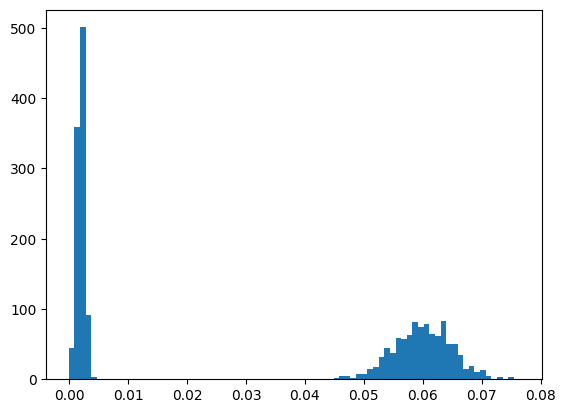

In [4]:
n_bins = 80
bins_counts, bins_edges, _ = plt.hist(samples1, bins=n_bins)

# Online HistogramBuilder with variable length between bins

A histogram can be approximated via the following aggregative approach based on the algorithm presented in Yael Ben-Haim and Elad Tom-Tov, "A streaming parallel decision tree algorithm", J. Machine Learning Research 11 (2010), pp. 849--872.

In [5]:
histogram_parameter = HistogramSpecification(n_bins=n_bins)
histogram_strategy = MergedHistogram(specification=histogram_parameter)
histogram_variable_length = histogram_strategy.create_online_histogram()

In [6]:
for sample in samples1:
    histogram_variable_length.insert(sample)

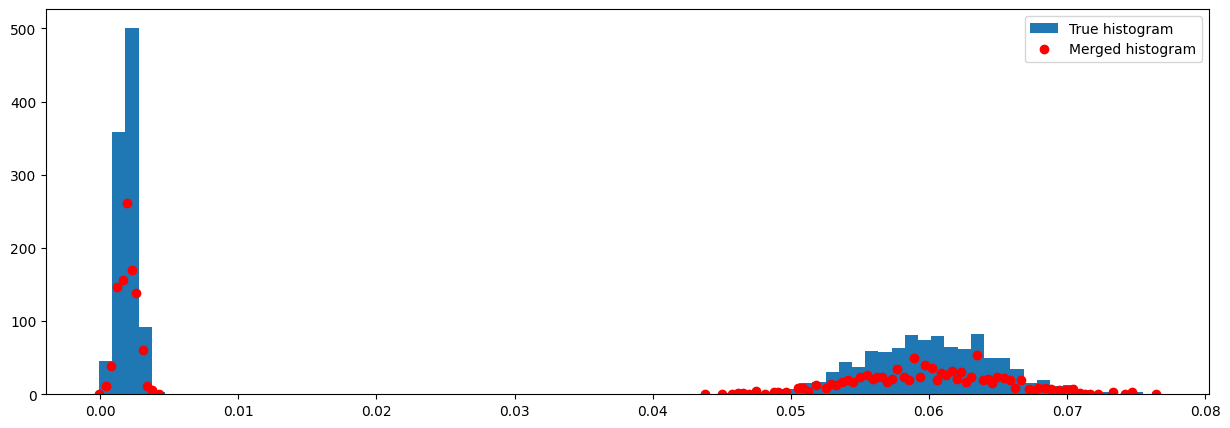

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.hist(samples1, bins=n_bins, label="True histogram")
ax.plot(histogram_variable_length.bins, histogram_variable_length.frequencies, "ro", label="Merged histogram")
_ = ax.legend()

# Fading Histogram with fixed length between bins

In [8]:
n_bins = 1000

histogram_parameter = HistogramSpecification(n_bins=n_bins, min_value = 0, max_value=0.08)
histogram_strategy = FadingHistogram(specification=histogram_parameter, alpha=0.998)
histogram_fixed_length = histogram_strategy.create_online_histogram()

In [9]:
for sample in samples1:
    histogram_fixed_length.insert(sample)

/home/julien/Github/signal/wavely/signal/processing/histogram.py:291: UserWarning: point added to the first bin.
  warnings.warn("point added to the first bin.")


In [10]:
fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].plot(samples1, label="Input signal")
ax[1].hist(samples1, bins=n_bins, label="True histogram")
ax[1].plot(histogram_fixed_length.bins, histogram_fixed_length.frequencies, "ro", label="Fading histogram")
_ = ax[1].legend()
_ = ax[0].legend()

In [ ]:
n_bins = 1000

histogram_parameter = HistogramSpecification(n_bins=n_bins, min_value = 0, max_value=0.08)
histogram_strategy = SlidingHistogram(specification=histogram_parameter)
histogram_fixed_length = histogram_strategy.create_online_histogram()

In [ ]:
for sample in samples1:
    histogram_fixed_length.insert(sample)

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].plot(samples1, label="Input signal")
ax[1].hist(samples1, bins=n_bins, label="True histogram")
ax[1].plot(histogram_fixed_length.bins, histogram_fixed_length.frequencies, "ro", label="Sliding histogram")
_ = ax[1].legend()
_ = ax[0].legend()

In [ ]:

histogram_parameter = HistogramSpecification(n_bins=n_bins,min_value = 0, max_value=0.08)
histogram_strategy = FadingHistogram(specification=histogram_parameter, alpha=0.98)
histogram_fixed_length = histogram_strategy.create_online_histogram()
for sample in samples2:
    histogram_fixed_length.insert(sample)

In [ ]:
fig, ax = plt.subplots(2, figsize=(10, 7))
ax[0].plot(samples2, label="Input signal")
ax[1].hist(samples2, bins=n_bins, label="True histogram")
ax[1].plot(histogram_fixed_length.bins, histogram_fixed_length.frequencies, "ro", label="Fading histogram")
_ = ax[1].legend()
_ = ax[0].legend()